<a href="https://colab.research.google.com/github/J0hnV1ct0r/Formacao_ML_Avancada_Alura/blob/main/linguagemNaturalIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Exploração dos dados

In [62]:
resenha = pd.read_csv('/content/drive/MyDrive/alura/imdb-reviews-pt-br.csv')
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do motivo pelo qual a maiori...       neg  
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3      Nem mesmo os Beatles puderam escrever músicas ...       neg  
4      Filmes de fotos de latão não é uma palavra apr...       neg  
...                                                  ...       ...  
49454  Como a média de votos era muito baixa, e o fat...       pos  
49455  O enredo teve algumas reviravoltas infelizes e...       pos  
49456  Estou espantado com a forma como este filme e ...       pos  
49457  A Christmas Together realmente veio antes do m...       pos  
49458  O drama romântico da classe trabalhadora do di...       pos  

[49459 rows x 4 columns]

In [63]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_en, resenha.sentiment, random_state=42)

In [64]:
print("negativo\n")
print(resenha.text_en[189])

negativo

This is without doubt the worst movie i have ever seen. And believe me, I have seen a lot of movies. The unbelievable twist the movie makes - going from an extremely bad "Alien lifeforms inhabit earth" movie with sickening bad acting, to a film that tries to spread an Archchristian "Judgement day is at hand, seek Jesus or though shall burn for all eternity in the fiery debts of hell" message - left me stunned after being tormented for 85 minutes. Even religious Christians must be ashamed or furious by watching their beliefs being posted like this. I didnt know what to do with myself when I watched the horrible acting that could have been performed by 7-year-olds. Simply disgusting. I am not a Christian nor very religious. But if I had been, I would no longer be afraid of Hell. Rich Christiano has shown be something much, much worse.


In [65]:
print("positivo\n")
print(resenha.text_en[49002])

positivo

Growing up in NYC in the late 80s/early 90s club-scene, I can personally say this is one of the most important documentaries made in covering that place in this time period. No Madonna did not come up with the idea of Voguing but this is where she got it from! Instead of taking out violence on each other or in bitchy cat fights, voguing allowed people to "fight" within the confines of everything short of touching each other which would warrant an automatic disqualification. Seeing these kind of extraordinarily talented/well orchestrated "throw-downs" in the clubs was nothing short of spectacular and all the big names from back in the day are here...Pepper La Beija, Paris DuprÃ©e,Xtragavaganza, etc...all commemorated in the likes of such period-pieces as Malcom McLarens song "Deep in Vogue"...it didnt matter who you were, or where you were from because when you walked through those doors into this "magic kingdom" of sorts, you became part of something bigger than yourself/you 

In [66]:
print(resenha.sentiment.value_counts())

sentiment
neg    24765
pos    24694
Name: count, dtype: int64


In [67]:
classificação = resenha["sentiment"].replace(["neg","pos"],[0,1])

<ipython-input-67-52c385faebf0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classificação = resenha["sentiment"].replace(["neg","pos"],[0,1])


In [68]:
classificação.head()

0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64

In [69]:
resenha["classificação"] = classificação

In [70]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificação  
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0  
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0  
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0  
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0  
4  Filmes de fotos de latão não é uma palavra apr...       neg              0

# Preprocessamento dos dados

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

## testes com a biblioteca

In [72]:
#teste da funçãoo de extração
texto = ["Borderlands é um execelente filme", "Borderlands é um pessimo filme"]
vetorizador = CountVectorizer(lowercase=False)
bag_of_words = vetorizador.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [73]:
vetorizador.get_feature_names_out()

array(['Borderlands', 'execelente', 'filme', 'pessimo', 'um'],
      dtype=object)

In [74]:
dense_matrix = bag_of_words.toarray()

#representado como matriz esparsa
matriz_esparsa = pd.DataFrame({col: pd.arrays.SparseArray(dense_matrix[:, i])
                               for i, col in enumerate(vetorizador.get_feature_names_out())})
matriz_esparsa

Borderlands  execelente  filme  pessimo  um
0            1           1      1        0   1
1            1           0      1        1   1

In [75]:
#representado como um dataframe comum do pandas
matriz_pandas = pd.DataFrame(dense_matrix, columns=vetorizador.get_feature_names_out())
matriz_pandas

Borderlands  execelente  filme  pessimo  um
0            1           1      1        0   1
1            1           0      1        1   1

## aplicando a vetorização ao dados

In [76]:
vetorizador = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizador.fit_transform(resenha.text_en)

In [77]:
print(bag_of_words.shape)

(49459, 50)


# Treinando o modelo

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [79]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, resenha.classificação, random_state=42)

In [80]:
regressoa_logistica = LogisticRegression()
regressoa_logistica.fit(treino,classe_treino)
acuracia = regressoa_logistica.score(teste,classe_teste)
print("Acurácia: %f" % acuracia)


Acurácia: 0.649252


In [81]:
def classificar_texto(texto, coluna_texto, coluna_classificação):
  vetorizador = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizador.fit_transform(texto[coluna_texto])
  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificação], random_state=42)

  regressoa_logistica = LogisticRegression()
  regressoa_logistica.fit(treino,classe_treino)
  return regressoa_logistica.score(teste,classe_teste)


In [82]:
print(classificar_texto(resenha, "text_en", "classificação"))

0.6492519207440356


# Word cloud


In [83]:
pip install wordcloud

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [85]:
todas_palavras = ' '.join([texto for texto in resenha['text_en']])

In [86]:
print(todas_palavras[:4])

Once


In [87]:
nuvem_palavras = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(todas_palavras)

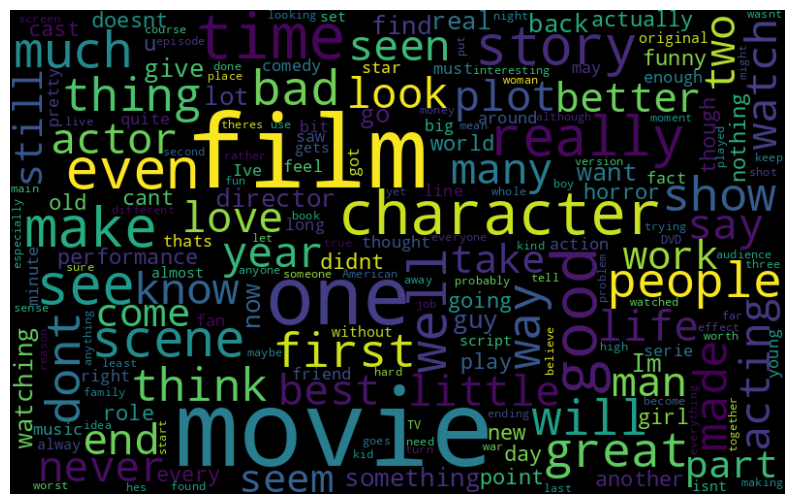

In [88]:
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [89]:
resenha.query('sentiment == "pos"')

id                                            text_en  \
12389  12391  I went and saw this movie last night after bei...   
12390  12392  Actor turned director Bill Paxton follows up h...   
12391  12393  As a recreational golfer with some knowledge o...   
12392  12394  I saw this film in a sneak preview, and it is ...   
12393  12395  Bill Paxton has taken the true story of the 19...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
12389  Eu fui e vi este filme ontem à noite depois de...       pos   
12390  O diretor do ator, Bill Paxton, segue sua prom...       pos   
12391  Como um jogador de recreio com algum conhecime...       pos   
12392  Eu vi esse filme em uma prévia, e é delicioso....       pos   
12393  Bill Paxton levou a verdadeira história do gol...       pos   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificação  
12389              1  
12390              1  
12391              1  
12392              1  
12393              1  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[24694 rows x 5 columns]

In [90]:
def nuvem_palavras(texto, coluna_texto, sentimento_classificação):
  texto_filtrado = texto.query(f'sentiment == "{sentimento_classificação}"')
  todas_palavras = ' '.join([texto for texto in texto_filtrado[coluna_texto]])
  nuvem_palavras = WordCloud(width=800, height=500, random_state=21, max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

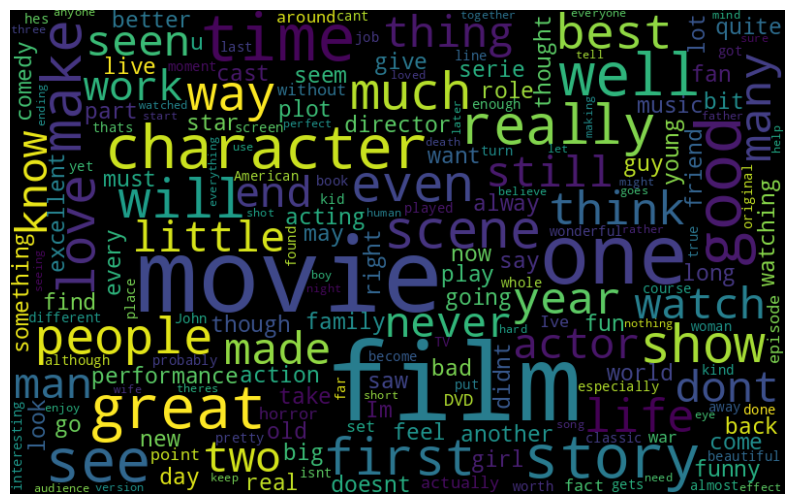

In [91]:
nuvem_palavras(resenha, "text_en", "pos")

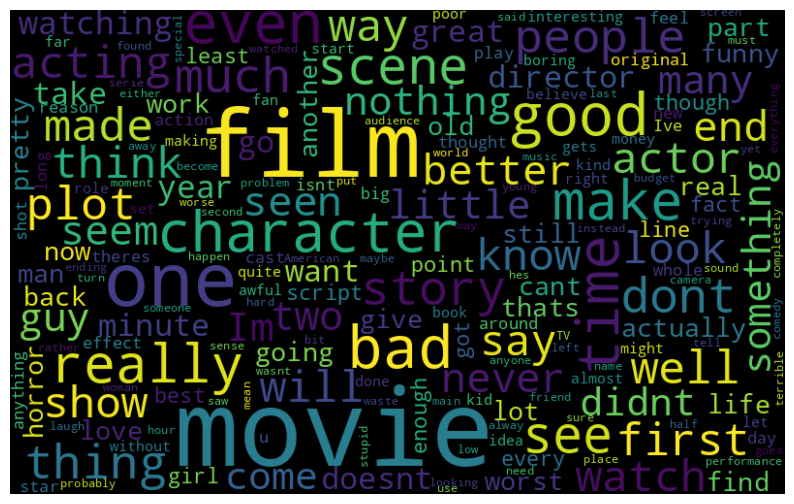

In [92]:
nuvem_palavras(resenha, "text_en", "neg")

# NLTK

In [93]:
pip install nltk

In [94]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [95]:
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
token_texto = token_espaco.tokenize(todas_palavras)
frequencia_palavras = nltk.FreqDist(token_texto)
df_frequencia_palavras = pd.DataFrame({"Palavras": list(frequencia_palavras.keys()),
                                      "Frequência": list(frequencia_palavras.values())})

frequencia_palavras.most_common(10)

[('the', 541903),
 ('a', 294097),
 ('and', 290407),
 ('of', 269316),
 ('to', 248555),
 ('is', 194182),
 ('in', 162011),
 ('I', 131434),
 ('that', 120419),
 ('this', 110592)]

In [96]:
df_frequencia_palavras.head()

Palavras  Frequência
0     Once         598
1    again        3283
2      Mr.        1912
3  Costner          57
4      has       30803

In [97]:
import seaborn as sns
def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_espaco = tokenize.WhitespaceTokenizer()
  token_texto = token_espaco.tokenize(todas_palavras)
  frequencia_palavras = nltk.FreqDist(token_texto)
  df_frequencia_palavras = pd.DataFrame({"Palavras": list(frequencia_palavras.keys()),
                                        "Frequência": list(frequencia_palavras.values())})
  df_frequencia = df_frequencia_palavras.nlargest(columns="Frequência", n = quantidade)
  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_frequencia_palavras.head(10), x="Palavras", y="Frequência", color = "gray")
  ax.set(ylabel="Contagem")
  plt.xticks(rotation=90)
  plt.show

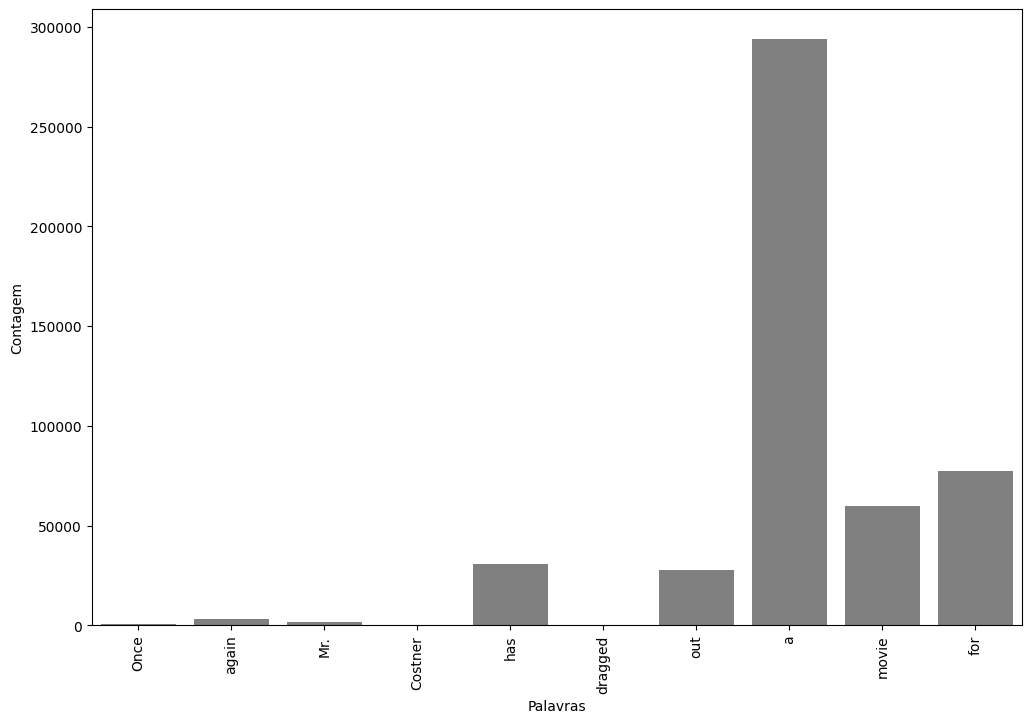

In [98]:
pareto(resenha, "text_en", 10)

In [99]:
def pareto_acm(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([resenha for resenha in texto[coluna_texto]])
  token_espaco = nltk.tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencias = nltk.FreqDist(token_frase)
  df_frequencias = pd.DataFrame({'Palavras': list(frequencias.keys()),
                               'Frequencia': list(frequencias.values())})
  df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequencia')

  total = df_frequencias['Frequencia'].sum()
  df_frequencias['Porcentagem'] = df_frequencias['Frequencia'].cumsum() / total * 100

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_frequencias, x='Palavras', y='Frequencia', color='gray')
  ax2 = ax.twinx()
  sns.lineplot(data=df_frequencias, x='Palavras', y='Porcentagem', color='red', sort=False, ax=ax2)
  plt.show()

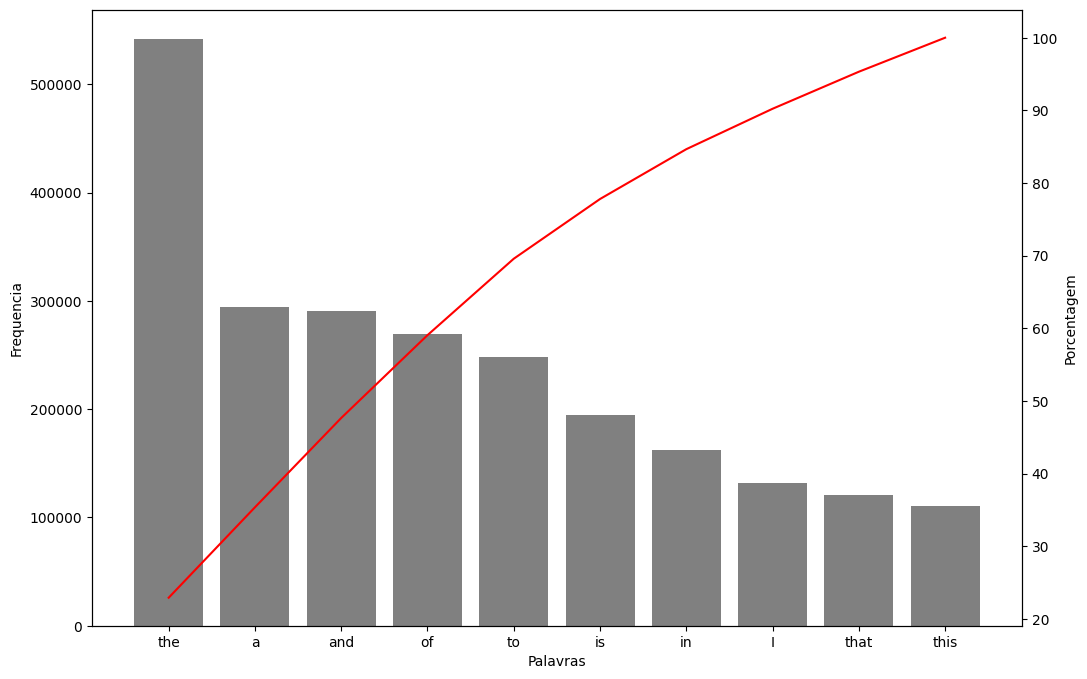

In [100]:
pareto_acm(resenha, "text_en", 10)

In [101]:
stopwords = nltk.corpus.stopwords.words('english')
#stopwords

# Tratamento 1

**Tramaneto com a lingua inglesa**

In [102]:
nova_frase = list()
for review in resenha.text_en:
  palavras = token_espaco.tokenize(review)
  palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords]
  frase_processada = ' '.join(palavras_sem_stopwords)
  nova_frase.append(frase_processada)

resenha['tratamento_1']=nova_frase
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificação                                       tratamento_1  
0                  0  Once Mr. Costner dragged movie far longer nece...  
1                  0  This example majority action films same. Gener...  
2                  0  First I hate moronic rappers, couldnt act gun ...  
3                  0  Not even Beatles could write songs everyone li...  
4                  0  Brass pictures movies fitting word really some...  
...              ...                                                ...  
49454              1  Seeing vote average pretty low, fact clerk vid...  
49455              1  The plot wretched, unbelievable twists. Howeve...  
49456              1  I amazed movieand others average 5 stars lower...  
49457              1  A Christmas Together actually came time, Ive r...  
49458              1  Working-class romantic drama director Martin R...  

[49459 rows x 6 columns]

In [103]:
#classificação com tratamento
classificar_texto(resenha, "tratamento_1", "classificação")

0.7056207035988677

In [104]:
#classificação sem tratamento
classificar_texto(resenha, "text_en", "classificação")

0.6492519207440356

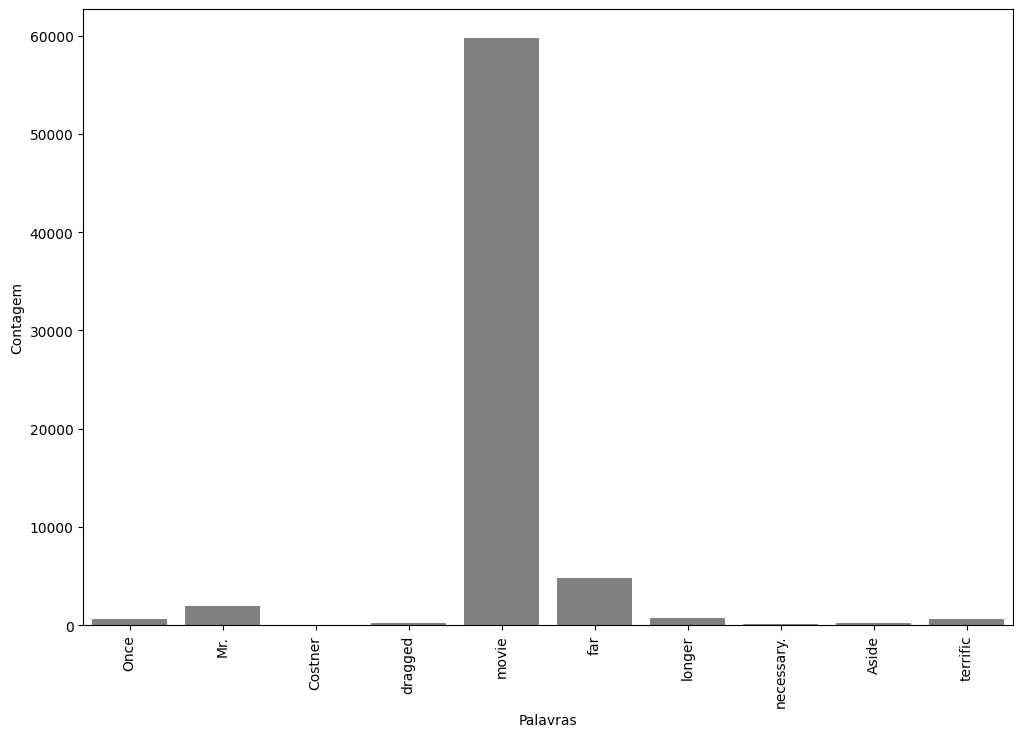

In [105]:
pareto(resenha, "tratamento_1", 10)

**Tratamento com a lingua portuguesa**

In [106]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [107]:
nova_frase = list()
for review in resenha.text_pt:
  palavras = token_espaco.tokenize(review)
  palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords]
  frase_processada = ' '.join(palavras_sem_stopwords)
  nova_frase.append(frase_processada)

resenha['tratamento_1']=nova_frase
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificação                                       tratamento_1  
0                  0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1                  0  Este exemplo motivo maioria filmes ação mesmos...  
2                  0  Primeiro tudo odeio raps imbecis, poderiam agi...  
3                  0  Nem Beatles puderam escrever músicas todos gos...  
4                  0  Filmes fotos latão palavra apropriada eles, ve...  
...              ...                                                ...  
49454              1  Como média votos baixa, fato funcionário locad...  
49455              1  O enredo algumas reviravoltas infelizes inacre...  
49456              1  Estou espantado forma filme maioria outros méd...  
49457              1  A Christmas Together realmente veio antes temp...  
49458              1  O drama romântico classe trabalhadora diretor ...  

[49459 rows x 6 columns]

In [108]:
#classificação com tratamento
classificar_texto(resenha, "tratamento_1", "classificação")

0.6810351799433886

In [109]:
#classificação sem tratamento
classificar_texto(resenha, "text_pt", "classificação")

0.6583097452486858

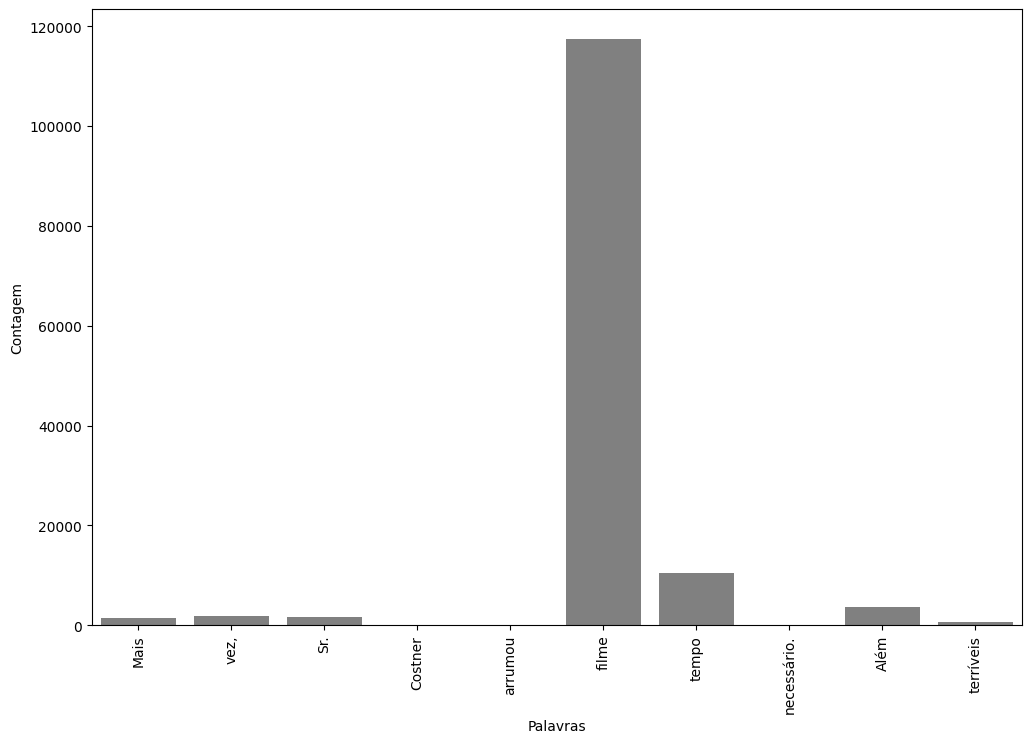

In [110]:
pareto(resenha, "tratamento_1", 10)

# Tratamento 2

In [111]:
from string import punctuation

In [112]:
token_pontuacao = tokenize.WordPunctTokenizer()

In [113]:
# lista de pontuação
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

In [114]:
pontuacao_stopwords = stopwords + pontuacao

In [115]:
nova_frase = list()
for review in resenha.tratamento_1:
  palavras = token_pontuacao.tokenize(review)
  palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in pontuacao_stopwords]
  frase_processada = ' '.join(palavras_sem_stopwords)
  nova_frase.append(frase_processada)

resenha['tratamento_2']=nova_frase
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificação                                       tratamento_1  \
0                  0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1                  0  Este exemplo motivo maioria filmes ação mesmos...   
2                  0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3                  0  Nem Beatles puderam escrever músicas todos gos...   
4                  0  Filmes fotos latão palavra apropriada eles, ve...   
...              ...                                                ...   
49454              1  Como média votos baixa, fato funcionário locad...   
49455              1  O enredo algumas reviravoltas infelizes inacre...   
49456              1  Estou espantado forma filme maioria outros méd...   
49457              1  A Christmas Together realmente veio antes temp...   
49458              1  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_2  
0      Mais vez Sr Costner arrumou filme tempo necess...  
1      Este exemplo motivo maioria filmes ação mesmos...  
2      Primeiro tudo odeio raps imbecis poderiam agir...  
3      Nem Beatles puderam escrever músicas todos gos...  
4      Filmes fotos latão palavra apropriada verdade ...  
...                                                  ...  
49454  Como média votos baixa fato funcionário locado...  
49455  O enredo algumas reviravoltas infelizes inacre...  
49456  Estou espantado forma filme maioria outros méd...  
49457  A Christmas Together realmente veio antes temp...  
49458  O drama romântico classe trabalhadora diretor ...  

[49459 rows x 7 columns]

In [116]:
#classificação com tratamento
classificar_texto(resenha, "tratamento_2", "classificação")

0.6892033966841893

In [117]:
#classificação sem tratamento
classificar_texto(resenha, "text_pt", "classificação")

0.6583097452486858

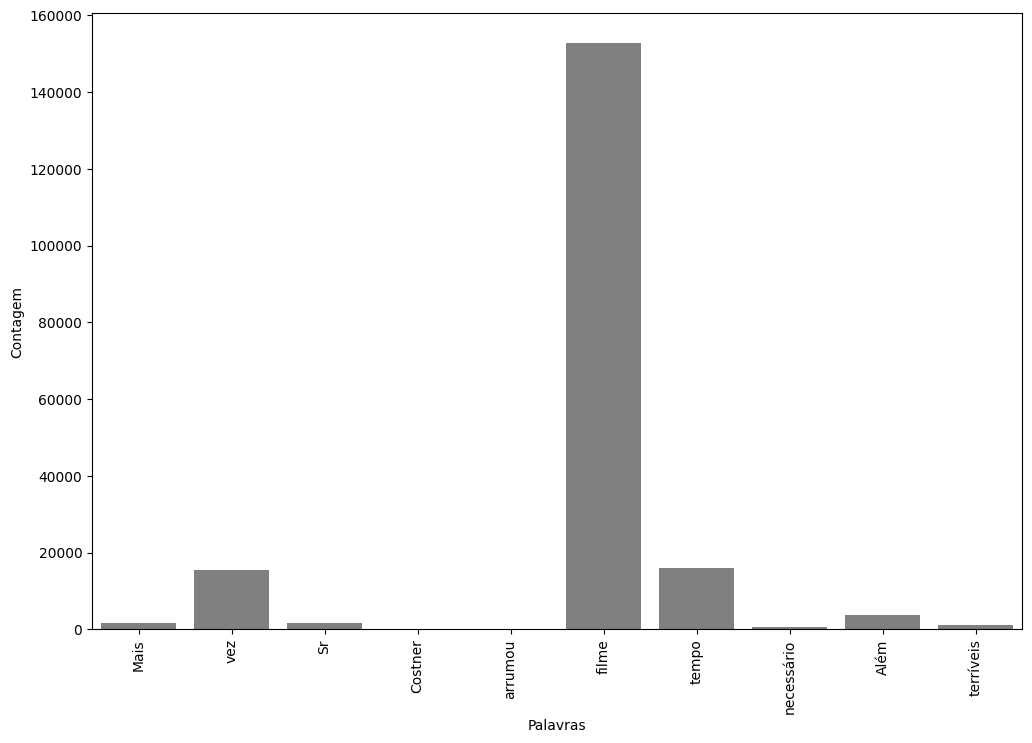

In [118]:
pareto(resenha, "tratamento_2", 10)

# Tratamento 3

In [121]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.5 MB/s eta 0:00:00


In [122]:
import unidecode

In [124]:
sem_acento = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [125]:
stopwods_sem_acento = [unidecode.unidecode(stopword) for stopword in pontuacao_stopwords]

In [126]:
resenha['tratamento_3'] = sem_acento
nova_frase = list()
for review in resenha.tratamento_3:
  palavras = token_pontuacao.tokenize(review)
  palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwods_sem_acento]
  frase_processada = ' '.join(palavras_sem_stopwords)
  nova_frase.append(frase_processada)

resenha['tratamento_3']=nova_frase
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificação                                       tratamento_1  \
0                  0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1                  0  Este exemplo motivo maioria filmes ação mesmos...   
2                  0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3                  0  Nem Beatles puderam escrever músicas todos gos...   
4                  0  Filmes fotos latão palavra apropriada eles, ve...   
...              ...                                                ...   
49454              1  Como média votos baixa, fato funcionário locad...   
49455              1  O enredo algumas reviravoltas infelizes inacre...   
49456              1  Estou espantado forma filme maioria outros méd...   
49457              1  A Christmas Together realmente veio antes temp...   
49458              1  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_2  \
0      Mais vez Sr Costner arrumou filme tempo necess...   
1      Este exemplo motivo maioria filmes ação mesmos...   
2      Primeiro tudo odeio raps imbecis poderiam agir...   
3      Nem Beatles puderam escrever músicas todos gos...   
4      Filmes fotos latão palavra apropriada verdade ...   
...                                                  ...   
49454  Como média votos baixa fato funcionário locado...   
49455  O enredo algumas reviravoltas infelizes inacre...   
49456  Estou espantado forma filme maioria outros méd...   
49457  A Christmas Together realmente veio antes temp...   
49458  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_3  
0      Mais vez Sr Costner arrumou filme tempo necess...  
1      Este exemplo motivo maioria filmes acao mesmos...  
2      Primeiro tudo odeio raps imbecis poderiam agir...  
3      Nem Beatles puderam escrever musicas todos gos...  
4      Filmes fotos latao palavra apropriada verdade ...  
...                                                  ...  
49454  Como media votos baixa fato funcionario locado...  
49455  O enredo algumas reviravoltas infelizes inacre...  
49456  Estou espantado forma filme maioria outros med...  
49457  A Christmas Together realmente veio antes temp...  
49458  O drama romantico classe trabalhadora diretor ...  

[49459 rows x 8 columns]

In [130]:
#classificação com tratamento
classificar_texto(resenha, "tratamento_3", "classificação")

0.6887990295188031

In [129]:
#classificação sem tratamento
classificar_texto(resenha, "text_pt", "classificação")

0.6583097452486858

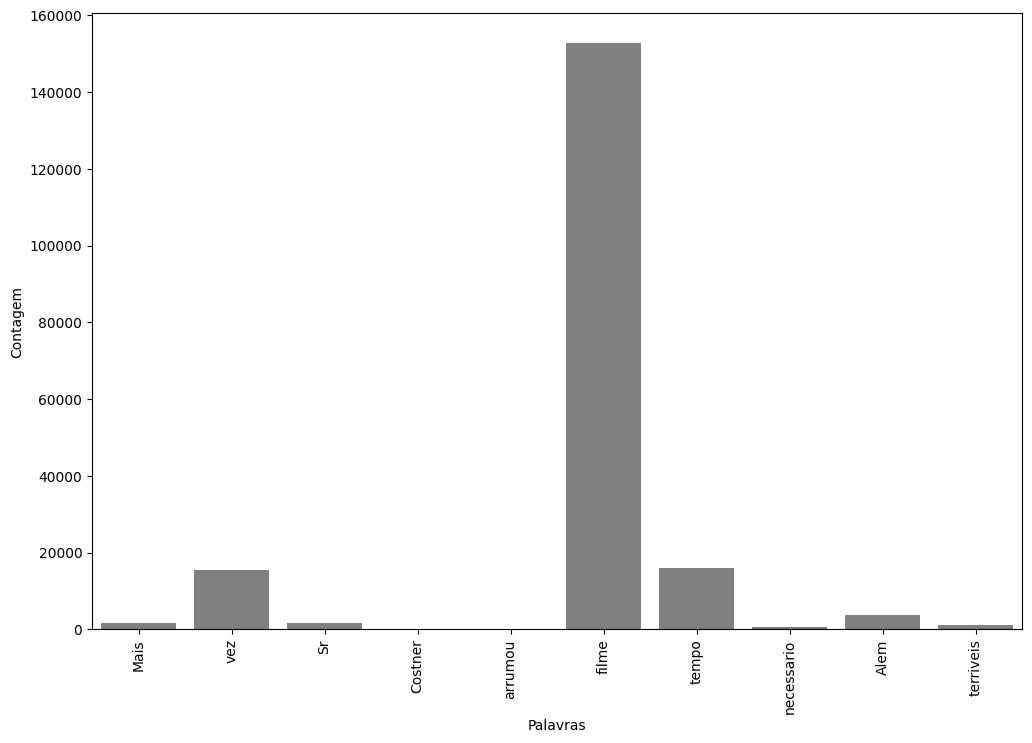

In [131]:
pareto(resenha, "tratamento_3", 10)

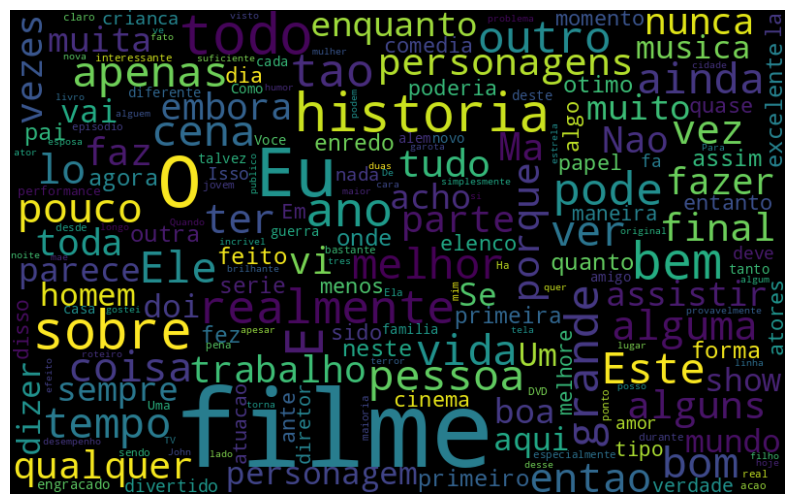

In [132]:
nuvem_palavras(resenha, "tratamento_3", "pos")

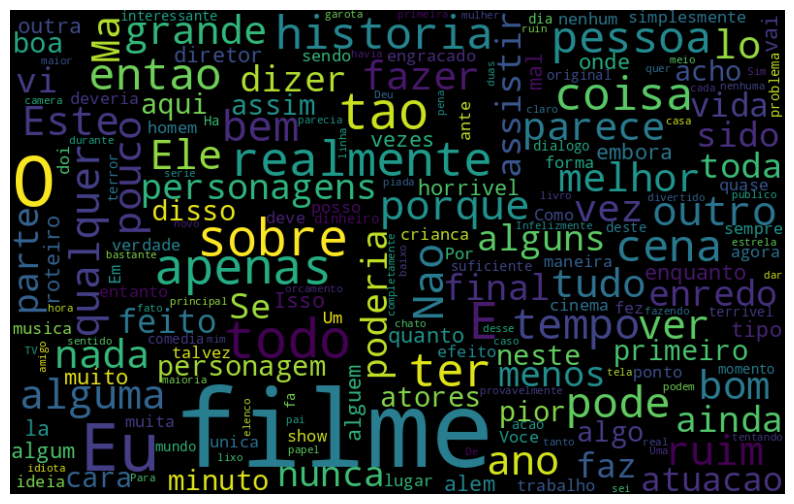

In [133]:
nuvem_palavras(resenha, "tratamento_3", "neg")

# Tratamento 4

In [135]:
nova_frase = list()
for review in resenha.tratamento_3:
  review = review.lower()
  palavras = token_pontuacao.tokenize(review)
  palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwods_sem_acento]
  frase_processada = ' '.join(palavras_sem_stopwords)
  nova_frase.append(frase_processada)

resenha['tratamento_4']=nova_frase
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificação                                       tratamento_1  \
0                  0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1                  0  Este exemplo motivo maioria filmes ação mesmos...   
2                  0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3                  0  Nem Beatles puderam escrever músicas todos gos...   
4                  0  Filmes fotos latão palavra apropriada eles, ve...   
...              ...                                                ...   
49454              1  Como média votos baixa, fato funcionário locad...   
49455              1  O enredo algumas reviravoltas infelizes inacre...   
49456              1  Estou espantado forma filme maioria outros méd...   
49457              1  A Christmas Together realmente veio antes temp...   
49458              1  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_2  \
0      Mais vez Sr Costner arrumou filme tempo necess...   
1      Este exemplo motivo maioria filmes ação mesmos...   
2      Primeiro tudo odeio raps imbecis poderiam agir...   
3      Nem Beatles puderam escrever músicas todos gos...   
4      Filmes fotos latão palavra apropriada verdade ...   
...                                                  ...   
49454  Como média votos baixa fato funcionário locado...   
49455  O enredo algumas reviravoltas infelizes inacre...   
49456  Estou espantado forma filme maioria outros méd...   
49457  A Christmas Together realmente veio antes temp...   
49458  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_3  \
0      Mais vez Sr Costner arrumou filme tempo necess...   
1      Este exemplo motivo maioria filmes acao mesmos...   
2      Primeiro tudo odeio raps imbecis poderiam agir...   
3      Nem Beatles puderam escrever musicas todos gos...   
4      Filmes fotos latao palavra apropriada verdade ...   
...                                                  ...   
49454  Como media votos baixa fato funcionario locado...   
49455  O enredo algumas reviravoltas infelizes inacre...   
49456  Estou espantado forma filme maioria outros med...   
49457  A Christmas Together realmente veio antes temp...   
49458  O drama romantico classe trabalhadora diretor ...   

                     

In [136]:
#classificação com tratamento
classificar_texto(resenha, "tratamento_4", "classificação")

0.688071168621108

In [137]:
#classificação sem tratamento
classificar_texto(resenha, "text_pt", "classificação")

0.6583097452486858

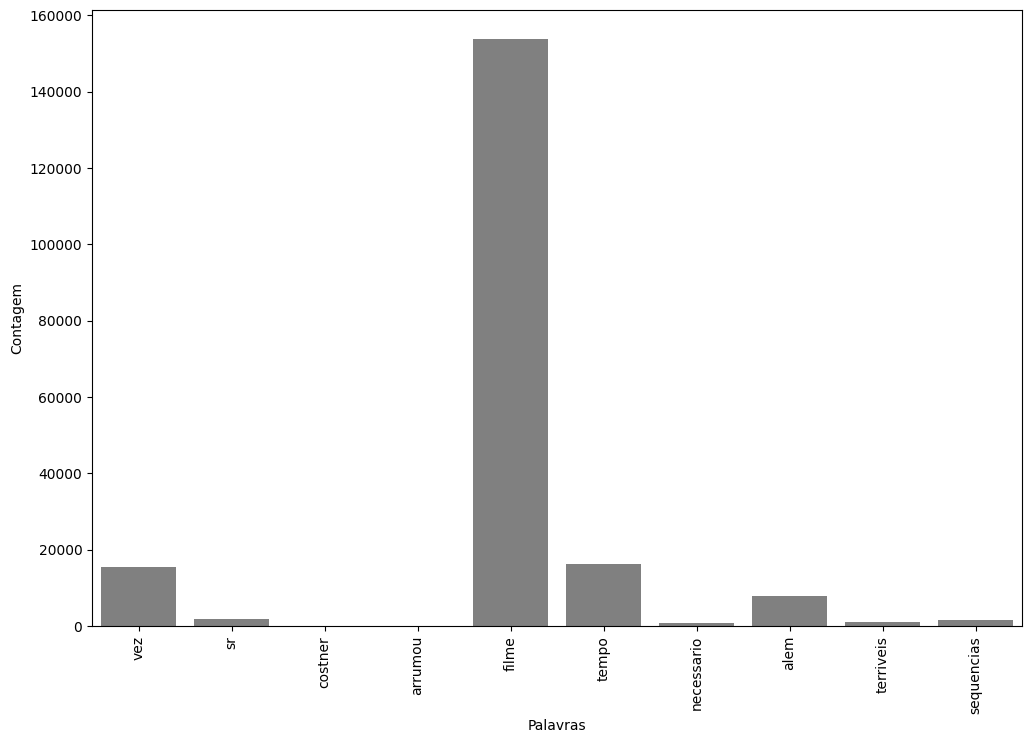

In [140]:
pareto(resenha, "tratamento_4", 10)

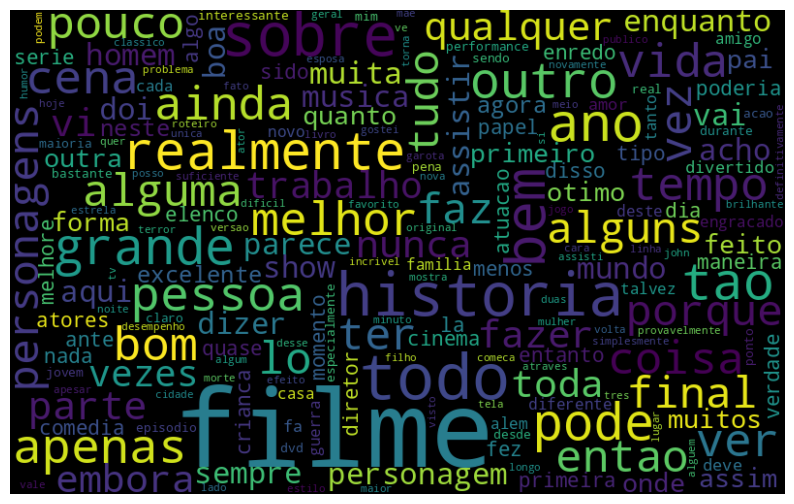

In [138]:
nuvem_palavras(resenha, "tratamento_4", "pos")

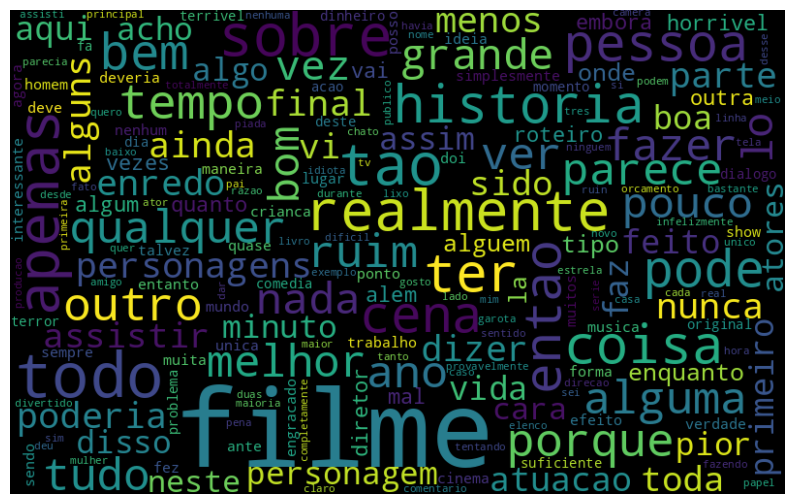

In [139]:
nuvem_palavras(resenha, "tratamento_4", "neg")

# Tratamento 5

In [141]:
stemmer = nltk.RSLPStemmer()

In [144]:
nova_frase = list()
for review in resenha.tratamento_4:
  palavras = token_pontuacao.tokenize(review)
  palavras_stemmer = [stemmer.stem(palavra) for palavra in palavras]
  frase_processada = ' '.join(palavras_stemmer)
  nova_frase.append(frase_processada)

resenha['tratamento_5']=nova_frase
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificação                                       tratamento_1  \
0                  0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1                  0  Este exemplo motivo maioria filmes ação mesmos...   
2                  0  Primeiro tudo odeio raps imbecis, poderiam agi...   
3                  0  Nem Beatles puderam escrever músicas todos gos...   
4                  0  Filmes fotos latão palavra apropriada eles, ve...   
...              ...                                                ...   
49454              1  Como média votos baixa, fato funcionário locad...   
49455              1  O enredo algumas reviravoltas infelizes inacre...   
49456              1  Estou espantado forma filme maioria outros méd...   
49457              1  A Christmas Together realmente veio antes temp...   
49458              1  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_2  \
0      Mais vez Sr Costner arrumou filme tempo necess...   
1      Este exemplo motivo maioria filmes ação mesmos...   
2      Primeiro tudo odeio raps imbecis poderiam agir...   
3      Nem Beatles puderam escrever músicas todos gos...   
4      Filmes fotos latão palavra apropriada verdade ...   
...                                                  ...   
49454  Como média votos baixa fato funcionário locado...   
49455  O enredo algumas reviravoltas infelizes inacre...   
49456  Estou espantado forma filme maioria outros méd...   
49457  A Christmas Together realmente veio antes temp...   
49458  O drama romântico classe trabalhadora diretor ...   

                                            tratamento_3  \
0      Mais vez Sr Costner arrumou filme tempo necess...   
1      Este exemplo motivo maioria filmes acao mesmos...   
2      Primeiro tudo odeio raps imbecis poderiam agir...   
3      Nem Beatles puderam escrever musicas todos gos...   
4      Filmes fotos latao palavra apropriada verdade ...   
...                                                  ...   
49454  Como media votos baixa fato funcionario locado...   
49455  O enredo algumas reviravoltas infelizes inacre...   
49456  Estou espantado forma filme maioria outros med...   
49457  A Christmas Together realmente veio antes temp...   
49458  O drama romantico classe trabalhadora diretor ...   

                     

In [145]:
#classificação com tratamento
classificar_texto(resenha, "tratamento_5", "classificação")

0.6955923978972908

In [146]:
#classificação sem tratamento
classificar_texto(resenha, "text_pt", "classificação")

0.6583097452486858

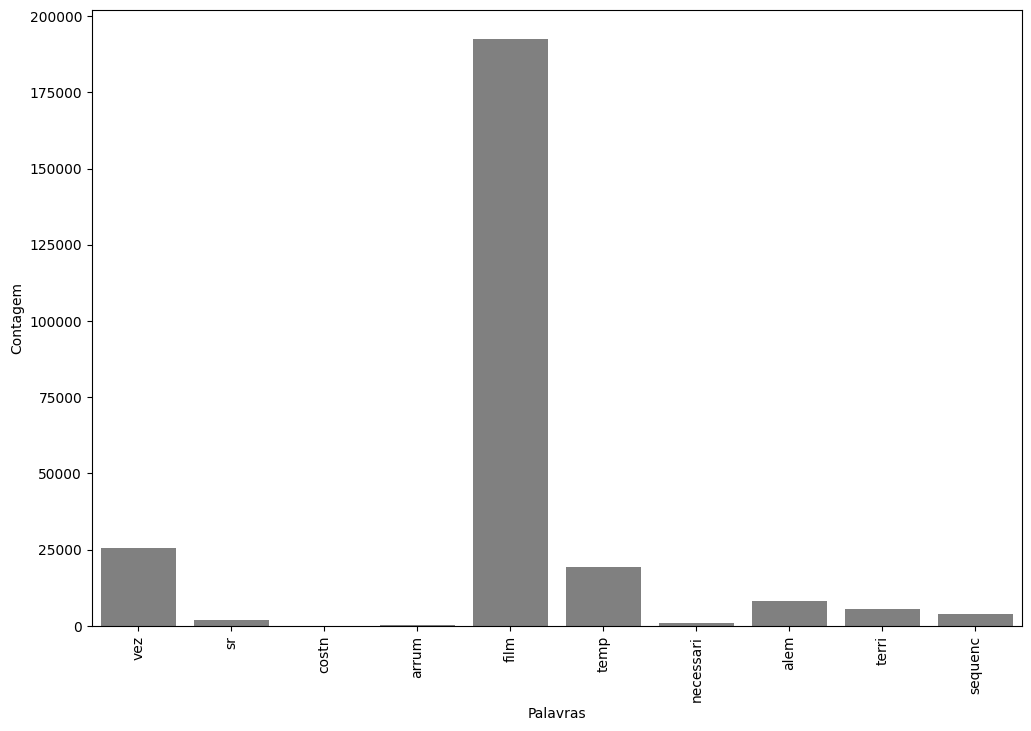

In [147]:
pareto(resenha, "tratamento_5", 10)

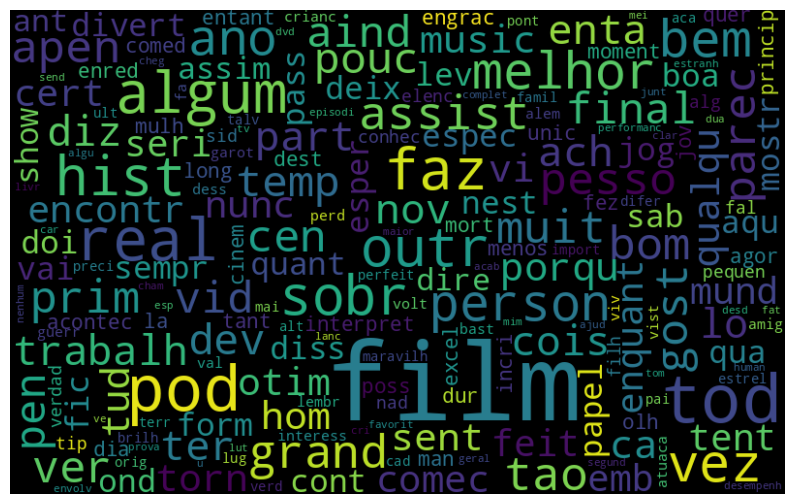

In [148]:
nuvem_palavras(resenha, "tratamento_5", "pos")

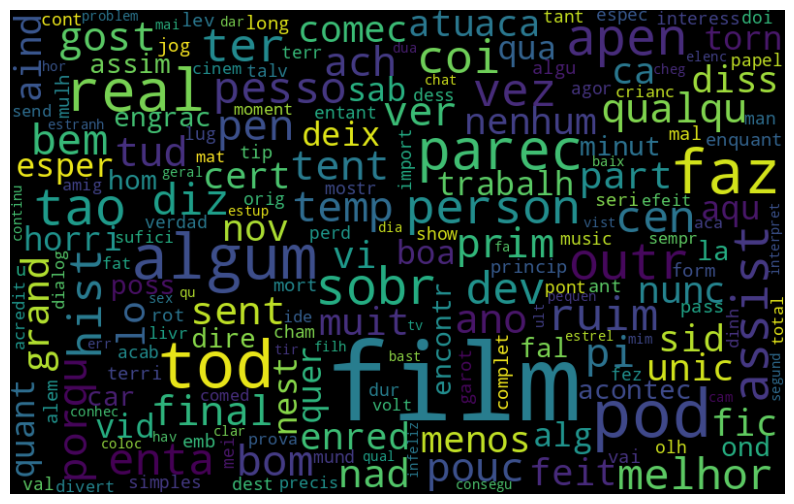

In [149]:
nuvem_palavras(resenha, "tratamento_5", "neg")

# Tfid

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

In [155]:
tfidf_bruto = tfidf.fit_transform(resenha.text_pt)
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              resenha.classificação,
                                                              random_state=42)
regressoa_logistica = LogisticRegression()
regressoa_logistica.fit(treino,classe_treino)
acuracia_bruto = regressoa_logistica.score(teste,classe_teste)
print("Acurácia: %f" % acuracia_bruto)

Acurácia: 0.660493


In [156]:
tfidf_tratado = tfidf.fit_transform(resenha.tratamento_5)
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratado,
                                                              resenha.classificação,
                                                              random_state=42)
regressoa_logistica = LogisticRegression()
regressoa_logistica.fit(treino,classe_treino)
acuracia_tratado = regressoa_logistica.score(teste,classe_teste)
print("Acurácia: %f" % acuracia_tratado)

Acurácia: 0.696482


# Ngrams

In [157]:
from nltk import ngrams

In [158]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(resenha.tratamento_5)
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha.classificação,
                                                              random_state=42)
regressoa_logistica = LogisticRegression()
regressoa_logistica.fit(treino,classe_treino)
acuracia_ngrams = regressoa_logistica.score(teste,classe_teste)
print("Acurácia: %f" % acuracia_ngrams)

Acurácia: 0.886696


In [159]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha.tratamento_5)
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha.classificação,
                                                              random_state=42)
regressoa_logistica = LogisticRegression()
regressoa_logistica.fit(treino,classe_treino)
acuracia_tfidf = regressoa_logistica.score(teste,classe_teste)
print("Acurácia: %f" % acuracia_tfidf)

Acurácia: 0.884270


In [165]:
pesos = pd.DataFrame(regressoa_logistica.coef_[0].T, index=tfidf.get_feature_names_out())
pesos.nlargest(50,0)


0
otim        8.215092
excel       7.903823
perfeit     6.521988
favorit     5.768388
maravilh    5.241512
incri       4.934224
hilari      4.735206
divert      4.486934
ador        4.398724
brilh       4.228919
hoj         4.201464
recom       4.192159
agrada      4.170295
definitiv   4.105753
soberb      3.628426
maravilhos  3.607866
surpreend   3.547543
ame         3.531762
bom         3.491222
class       3.447931
comov       3.420252
impression  3.415566
aind        3.389071
lind        3.182946
joi         3.134553
fascin      3.106755
mant        3.086596
dvd         3.084443
fort        3.061116
sutil       3.036450
subestim    3.025770
apreci      2.990157
gost        2.969625
melhor      2.949587
refresc     2.895253
difer       2.813807
espec       2.791638
sempr       2.754226
am          2.705948
human       2.701133
intens      2.667120
emocion     2.659624
inesper     2.639647
obr         2.633991
poder       2.628963
surpres     2.622068
fantas      2.619365
bem         2.608416
aproveit    2.596704
pequen      2.568166

In [166]:
pesos.nsmallest(50,0)

0
ruim       -9.174821
pi         -9.116361
horri      -8.681671
terri      -7.090521
chat       -6.844734
nad        -5.965650
infeliz    -5.276438
decepca    -5.128793
ridicul    -4.992068
decepcion  -4.984749
parec      -4.939398
nenhum     -4.839036
lix        -4.806388
desperdici -4.791337
irrit      -4.767440
mal        -4.529318
tent       -4.388699
estup      -4.370563
rot        -4.362467
salv       -4.340969
pobr       -4.319274
bagunc     -4.202722
desperdic  -4.130525
minut      -4.109625
entedi     -3.991233
supost     -3.984392
menos      -3.915774
previsi    -3.863753
barat      -3.847693
frac       -3.758909
tedi       -3.694304
mediocr    -3.664507
sid        -3.621561
desculp    -3.561988
evit       -3.503669
incomod    -3.415793
clich      -3.346614
insult     -3.292936
oh         -3.261286
idiot      -3.207123
pate       -3.206625
porc       -3.165976
hipotes    -3.141033
risivel    -3.126370
inutil     -3.072061
dinh       -3.056282
ter        -2.980160
apen       -2.957111
ma         -2.847952
raza       -2.792840

In [169]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(2,2)) # Only bigrams
vetor_tfidf = tfidf.fit_transform(resenha.tratamento_5)

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha.classificação,
                                                              random_state=42)
regressoa_logistica = LogisticRegression()
regressoa_logistica.fit(treino,classe_treino)



pesos = pd.DataFrame(regressoa_logistica.coef_[0].T, index=tfidf.get_feature_names_out())



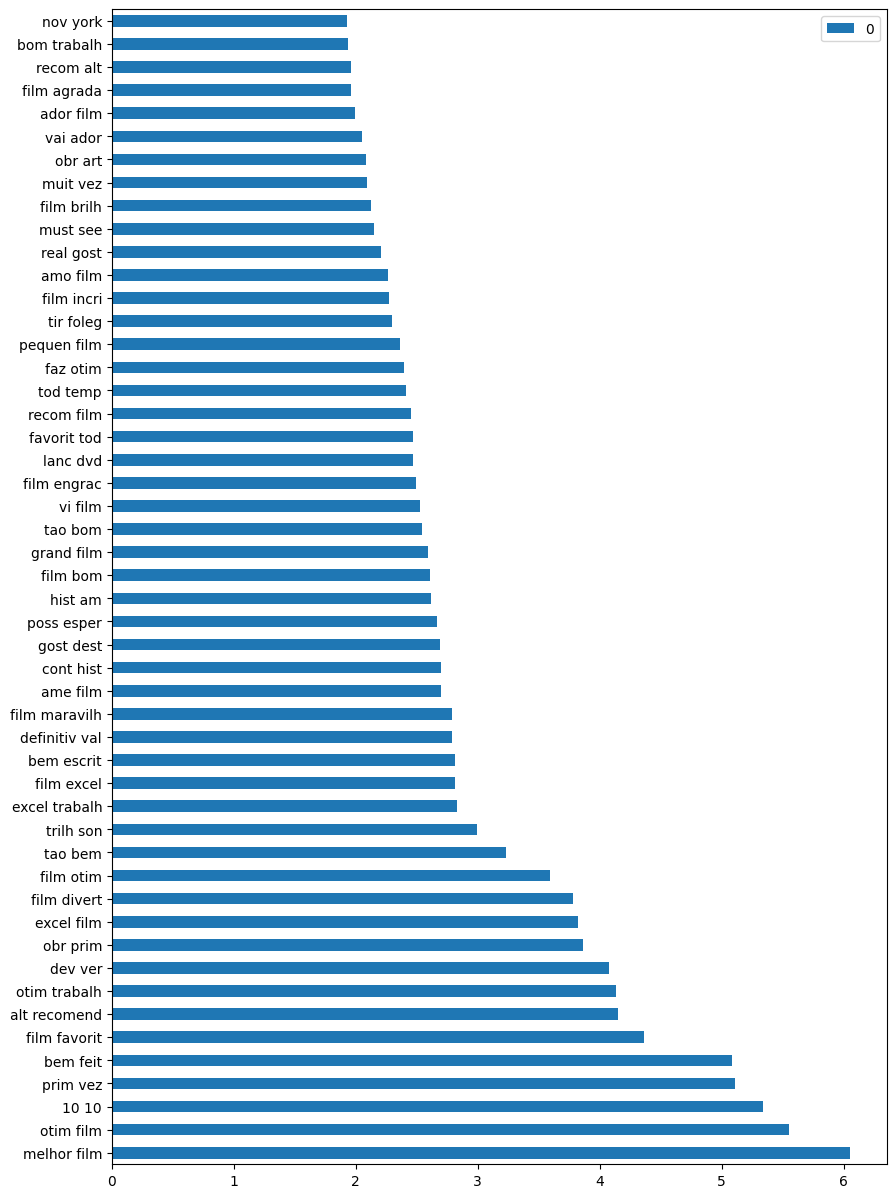

In [170]:
# Plot the top 50 bigrams
pesos.nlargest(50, 0).plot(kind='barh', figsize=(10, 15))
plt.show()

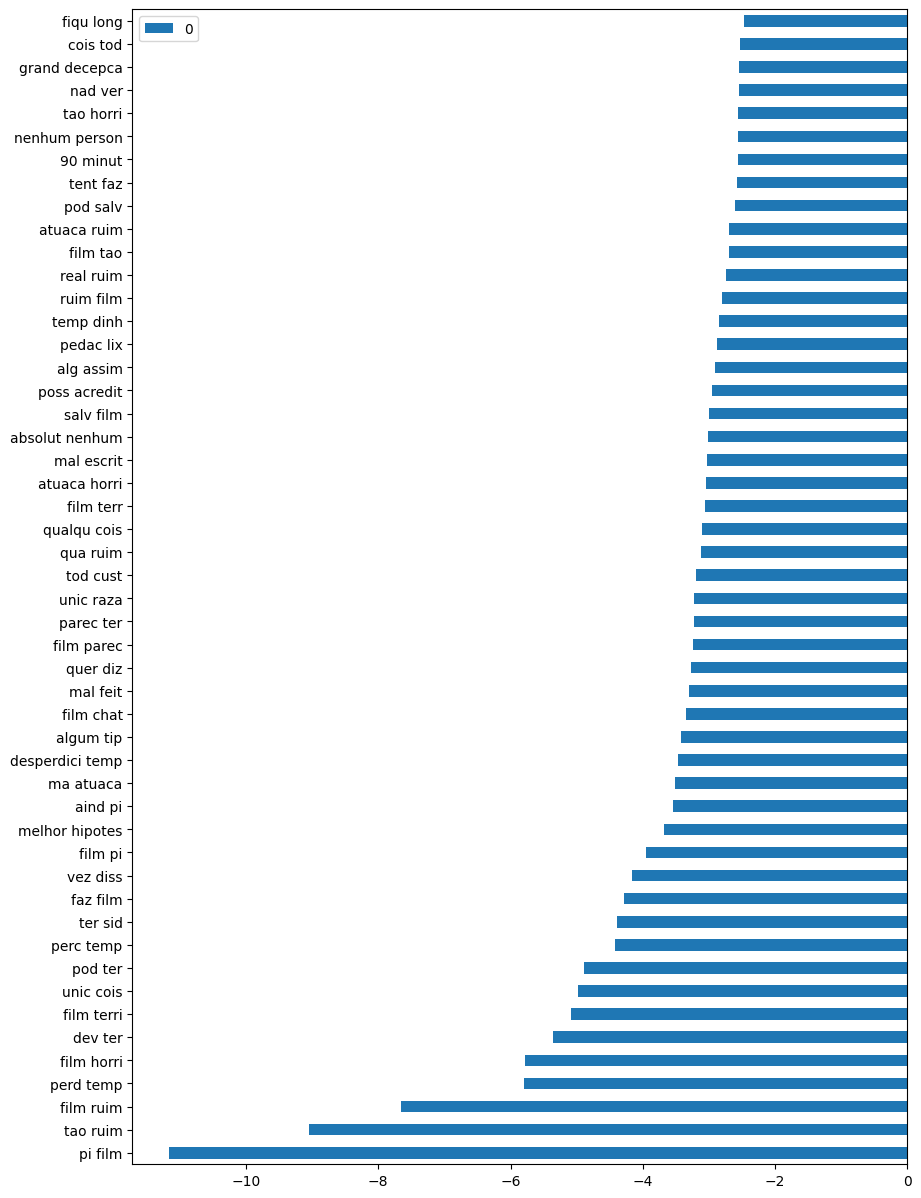

In [171]:
# Plot the top 50 bigrams
pesos.nsmallest(50, 0).plot(kind='barh', figsize=(10, 15))
plt.show()